In [4]:
import sys
import os
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added:", project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from src.analysis.data_loader import load_oil_data
from src.analysis.eda import plot_price, add_log_returns

plt.style.use("seaborn-v0_8")
print("Imports OK")


Project root added: c:\Users\Kifiya_Administrator\Desktop\brent-oil-change-point-analysis\brent-oil-change-point-analysis
Imports OK


In [5]:
df = load_oil_data("../data/raw/BrentOilPrices.csv")
df.head()


c:\Users\Kifiya_Administrator\Desktop\brent-oil-change-point-analysis\brent-oil-change-point-analysis\src\analysis\data_loader.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [6]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[us]
 1   Price   9011 non-null   float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 140.9 KB


,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


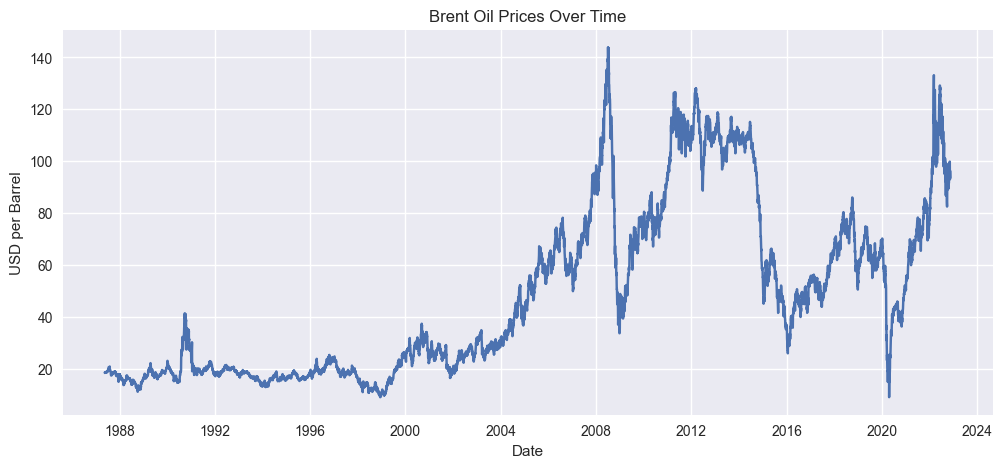

In [7]:
plot_price(df)


In [8]:
adf_result = adfuller(df["Price"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


In [9]:
df = add_log_returns(df)
df.head()


,Date,Price,log_return
0,1987-05-20,18.63,NaN
1,1987-05-21,18.45,-0.009709
2,1987-05-22,18.55,0.005405
3,1987-05-25,18.60,0.002692
4,1987-05-26,18.63,0.001612


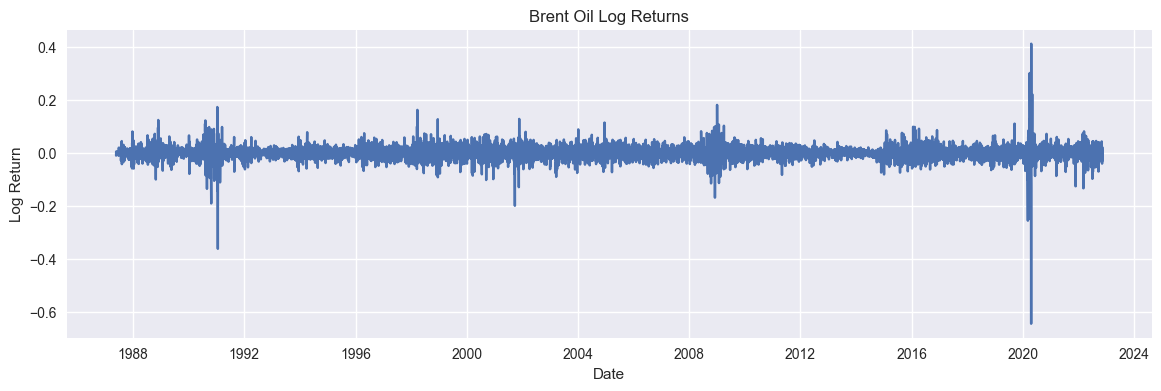

In [10]:
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["log_return"])
plt.title("Brent Oil Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


In [11]:
log_returns = df["log_return"].dropna()
adf_log = adfuller(log_returns)
print("ADF Statistic (Log Returns):", adf_log[0])
print("p-value:", adf_log[1])


ADF Statistic (Log Returns): -16.427113494485894
p-value: 2.4985801611428892e-29


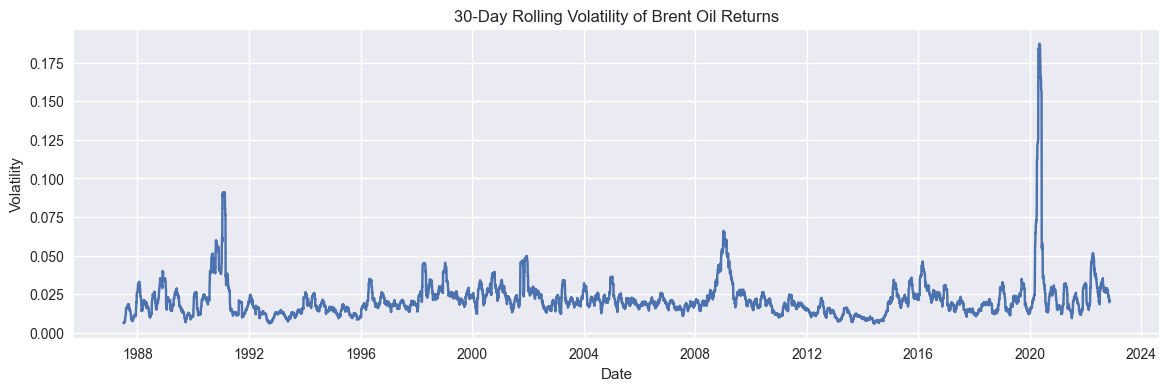

In [12]:
df["rolling_volatility"] = log_returns.rolling(window=30).std()
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["rolling_volatility"])
plt.title("30-Day Rolling Volatility of Brent Oil Returns")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


In [14]:
events = pd.read_csv("../data/events/oil_market_events.csv")
events["date"] = pd.to_datetime(events["date"])
events


,date,event
0,2011-02-15,Libyan Civil War begins
1,2014-11-27,OPEC decision to maintain production
2,2016-01-16,Iran sanctions lifted
3,2016-11-30,OPEC production cut agreement
4,2018-05-08,US withdraws from Iran nuclear deal
5,2020-03-08,Saudi-Russia oil price war
6,2020-03-11,COVID-19 declared a pandemic
7,2020-04-12,Historic OPEC+ production cuts
8,2021-10-01,Global energy supply crisis
9,2022-02-24,Russia-Ukraine war begins


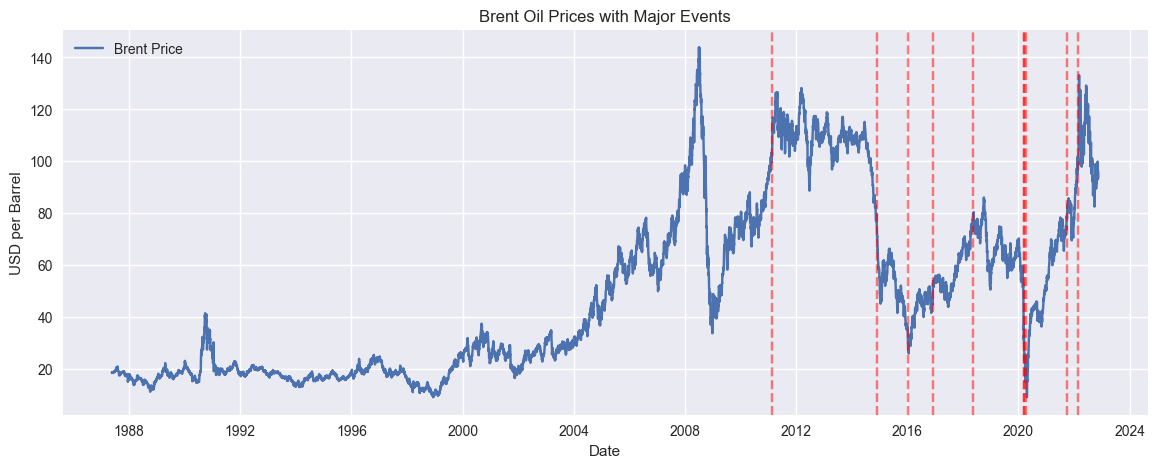

In [15]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Price"], label="Brent Price")
for _, row in events.iterrows():
    plt.axvline(row["date"], color="red", linestyle="--", alpha=0.5)
plt.title("Brent Oil Prices with Major Events")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.legend()
plt.show()
